In [1]:
# sklearn 모듈의 tree import
from sklearn import tree
from sklearn.datasets import load_iris
from os import system                 # graphviz 라이브러리 설치를 위함

In [2]:
# graphviz 라이브러리 설치 // 아래 예제에서 오류나는 경우 anaconda prompt에서 설치바람
system("pip install graphviz")

0

In [2]:
# graphviz 사용에 있어서 error발생원인이 환경변수일 경우 환경변수 추가 필요
# 환경변수 추가 후 환경변수 설정 아래코드
# os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\' 

# iris 실습데이터 로드
iris = load_iris()

In [3]:
#기본적인 의사결정 나무 : Information Gain - Gini
# 의사결정나무 분류 
clf = tree.DecisionTreeClassifier()               # 종속변수가 현재 범주형
clf = clf.fit(iris.data, iris.target)             # feature, target

In [4]:
# 시각화
dot_data = tree.export_graphviz(clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = iris.feature_names,  # feature 이름
                               class_names = iris.target_names,  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

In [7]:
import graphviz

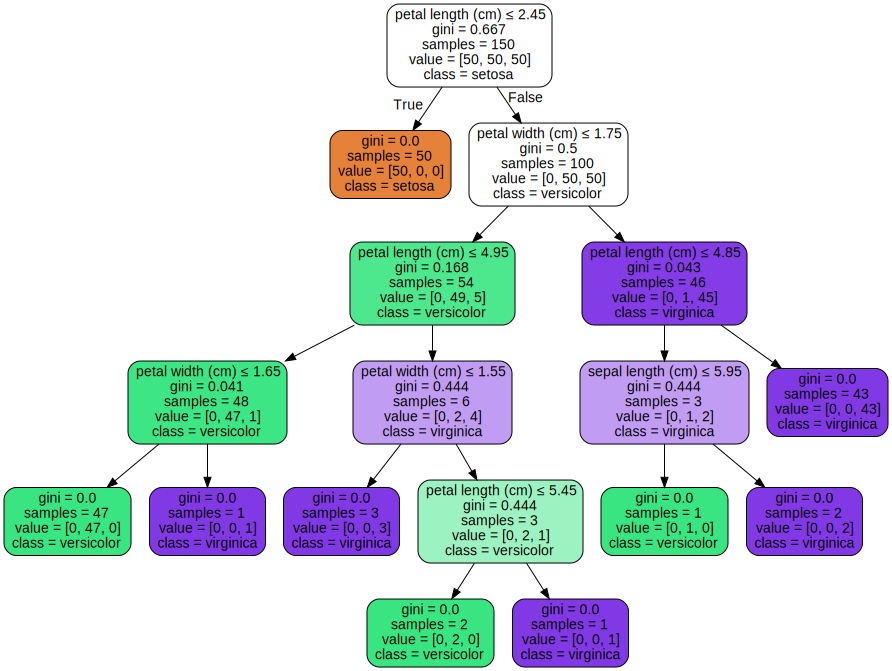

In [8]:
graph = graphviz.Source(dot_data)              
graph

In [9]:
#Information Gain - entropy 의사결정나무
# 의사결정나무 분류 
clf2 = tree.DecisionTreeClassifier(criterion = "entropy")  # Information Gain - entropy
clf2 = clf2.fit(iris.data, iris.target)        

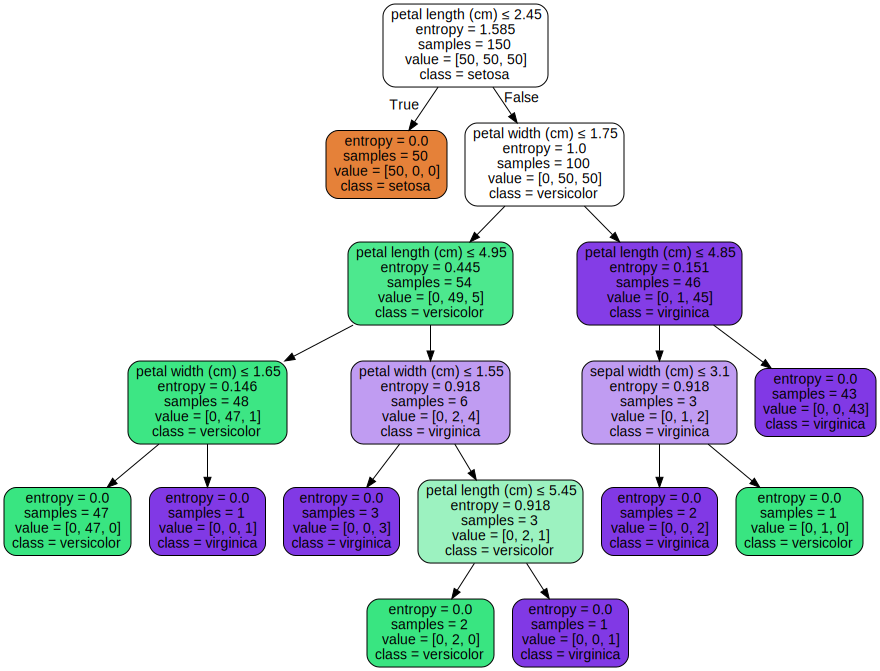

In [10]:
# 시각화
dot_data2 = tree.export_graphviz(clf2,        # 의사결정나무 모형 대입
                               out_file = None,     # file로 변환할 것인가
                               feature_names = iris.feature_names, # feature 이름
                               class_names = iris.target_names,   # target 이름
                               filled = True,        # 그림에 색상을 넣을것인가
                               rounded = True,       # 반올림을 진행할 것인가
                               special_characters = True)    # 특수문자를 사용하나

graph2 = graphviz.Source(dot_data2)              
graph2

In [11]:
#Pruning - 가지치기
# Pruning
clf3 = tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
clf3.fit(iris.data, iris.target)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

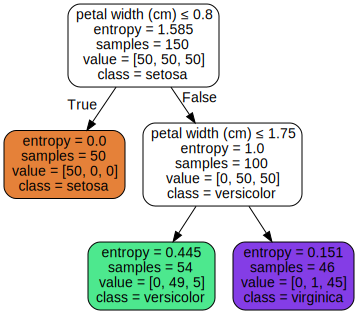

In [12]:
# 시각화
dot_data3 = tree.export_graphviz(clf3,               # 의사나무 모형 대입
                               out_file = None,        # file로 변환할 것인가
                               feature_names = iris.feature_names,  # feature 이름
                               class_names = iris.target_names,   # target 이름
                               filled = True,          # 그림에 색상을 넣을것인가
                               rounded = True,         # 반올림을 진행할 것인가
                               special_characters = True)  # 특수문자를 사용하나

graph3 = graphviz.Source(dot_data3)              
graph3

In [13]:
#Confusion matrix를 활용한 정확도 비교
from sklearn.metrics import confusion_matrix

# 1번 의사결정나무 - 지니계수 활용
confusion_matrix(iris.target, clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [14]:
# 2번 의사결정나무 - entropy 활용
confusion_matrix(iris.target, clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [15]:
# 3번 의사결정나무 - 가지치기 작업
confusion_matrix(iris.target, clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

Test 데이터로 정확도로 측정을 해야한다. Train 데이터로 정확도가 100%여도 의미가 없다. 오버피팅일 수 있기때문이다.
 데이터가 150개로 적기 때문에 층화추출법을 사용한다.

In [16]:
# 데이터셋 분리 함수
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data     #feature 
                                                    , iris.target     #target
                                                    , stratify = iris.target #층화추출법
                                                    , random_state = 1)  #난수고정

In [18]:
# train dataset
clf4 = tree.DecisionTreeClassifier(criterion = "entropy")
clf4.fit(X_train, y_train)

# test set predict confusion matrix
y_pred=clf4.predict(X_test)
confusion_matrix(y_test,clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 12]], dtype=int64)

In [26]:
from sklearn.metrics import accuracy_score

result=100*accuracy_score(y_test , y_pred)
print(result)

97.36842105263158
